<a href="https://colab.research.google.com/github/PrarthanaShende/Machine-Learning/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering
Build a model that creates customer groups who are frequently visiting the mall on basis of Age,Income and Spending

In [ ]:

path = r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Mall_Customers.csv'
import pandas as pd
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform basic data quality checks

In [ ]:

df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
## Duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:

df=df.drop_duplicates()

In [ ]:
# Missing values
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Separate X features. Consider the features for which you want clusters to be formed.
You can perform EDA to decide which features to consider for cluster creation

In [ ]:

X = df.drop(columns=['Gender','CustomerID'])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:

X.columns = ['Age','Income','Spending']
X.columns

Index(['Age', 'Income', 'Spending'], dtype='object')

## Data Cleaning and Preprocessing

In [ ]:
X.dtypes

,0
Age,int64
Income,int64
Spending,int64


In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Model Building

In [ ]:
pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

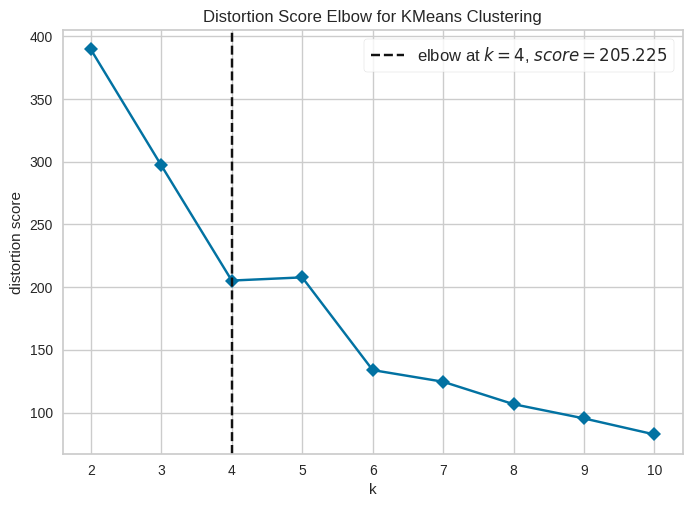

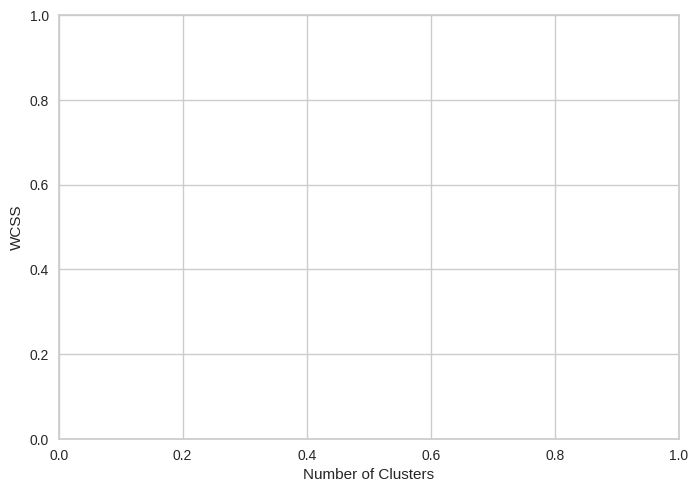

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import matplotlib.pyplot as plt

base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,11),timings=False)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
visualizer.show()


In [ ]:

## Build the model with K=4
final_model = KMeans(n_clusters=4) # k=n_clusters
clusters = final_model.fit_predict(X_pre) # cluster creation : 4 clusters , cluster information for each datapoint
clusters

array([0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 2, 0, 0, 0, 3, 3, 3, 3, 0, 2, 1, 1, 2, 1, 2, 1, 3, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:

final_model.cluster_centers_

array([[-0.96249203, -0.78476346,  0.39202966],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 0.03720536,  0.99011499, -1.18875705],
       [ 1.08616125, -0.49056525, -0.39717443]])

In [ ]:

X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:

X['Customer_Groups'] = clusters
X.head()


,Age,Income,Spending,Customer_Groups
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
for i in range(4):
  print(f'Cluster {i}')
  display(X[X['Customer_Groups']==i])
  print("===============")

Cluster 0


,Age,Income,Spending,Customer_Groups
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0


Cluster 1


,Age,Income,Spending,Customer_Groups
122,40,69,58,1
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1


Cluster 2


,Age,Income,Spending,Customer_Groups
112,38,64,42,2
121,38,67,40,2
124,23,70,29,2
126,43,71,35,2
130,47,71,9,2
132,25,72,34,2
134,20,73,5,2
136,44,73,7,2
138,19,74,10,2
140,57,75,5,2


Cluster 3


,Age,Income,Spending,Customer_Groups
6,35,18,6,3
8,64,19,3,3
10,67,19,14,3
12,58,20,15,3
14,37,20,13,3
...,...,...,...,...
117,49,65,59,3
118,51,67,43,3
119,50,67,57,3
128,59,71,11,3


Clusters- Visualization

In [ ]:

X.columns

Index(['Age', 'Income', 'Spending', 'Customer_Groups'], dtype='object')

In [ ]:

import plotly.express as ex
fig = ex.scatter_3d(X,x='Age',y='Income',z='Spending',color='Customer_Groups')
fig.show()

Save the X file

In [ ]:
X.to_csv("Mall_Customer_Groups.csv",index=False)